# Simple Linear Regression Model on delivery_time data

 Predict delivery time using sorting time

In [ ]:
#Importing necesary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns


from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from  sklearn.metrics import r2_score

In [ ]:
#Importing data

data=pd.read_csv('delivery_time.csv')
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [ ]:
# Data is not having any null value

Comment:-<br>
Here "x-variable" i.e., Independent variable is "Sorting Time" <br>
and "y-variable" i.e., Dependent variable is "Delivery Time"

In [ ]:
data.shape

(21, 2)

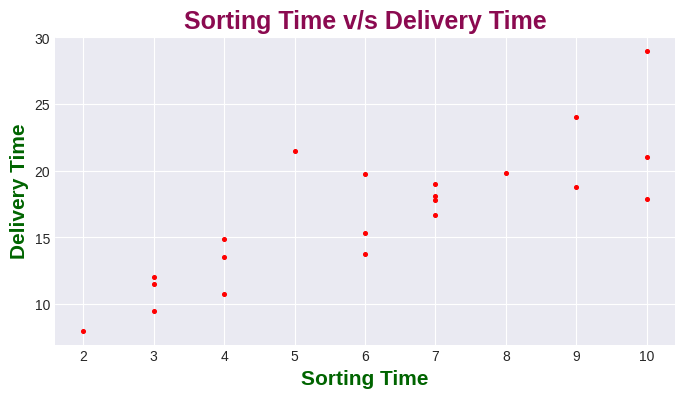

In [ ]:
#Plotting

plt.figure(figsize=(8,4))
plt.style.use("seaborn-darkgrid")

plt.scatter(data['Sorting Time'],data['Delivery Time'],s=7,color='red')

plt.title('Sorting Time v/s Delivery Time',size=18,color='#8B0A50',weight='bold')
plt.xlabel('Sorting Time',size=15,color='#006400',weight='bold')
plt.ylabel('Delivery Time',size=15,color='#006400',weight='bold')
plt.show();

Comments:-
*   As years of Sorting time increses Delivery time also increases.
*   Possitive realation between Sorting time and Delivery time.

In [ ]:
#Correlation between Delivery Time and Sorting Time

data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [ ]:
list(data) #columns name

['Delivery Time', 'Sorting Time']

In [ ]:
#Renaming columns
data_df=data.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)
data_df

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


### **Models for Linear Regression**

The general equation of a straight line is `y = mx + c`, where m is the gradient, and y = c is the value where the line cuts the y-axis. This number c is called the intercept on the y-axis. The equation of a straight line with gradient m and intercept c on the y-axis is `y = mx + c`.<br>

### Model-1 equation:-  **`y_hat = m*x + c`**

In [ ]:
model1 = smf.ols("delivery_time~sorting_time", data=data_df).fit()

In [ ]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           3.98e-06
Time:                        18:24:08   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Predicted Equation of straight line for "model1" is: <br>
`y_hat = 1.6490*x + 6.5827`

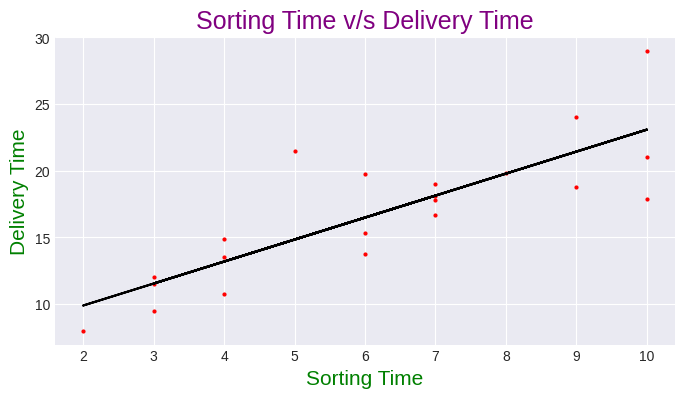

In [ ]:
#Plotting

plt.figure(figsize=(8,4))
plt.style.use("seaborn-darkgrid")

plt.scatter(data_df['sorting_time'],data_df['delivery_time'],color="red",s=4)
plt.plot(data_df['sorting_time'],model1.predict(),color="black")

plt.title("Sorting Time v/s Delivery Time",size=18,color="purple")
plt.xlabel('Sorting Time',size=15,color='green')
plt.ylabel('Delivery Time',size=15,color='green')
plt.show();

### Model-2 equation:- **`y_hat = m*log(x) + c`**

In [ ]:
model2=smf.ols('delivery_time~np.log(sorting_time)',data=data_df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           2.64e-06
Time:                        18:24:42   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(sorting_time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Predicted Equation of straight line for "model2" is: <br>
`y_hat = (9.0434)*log(x) +	1.1597`

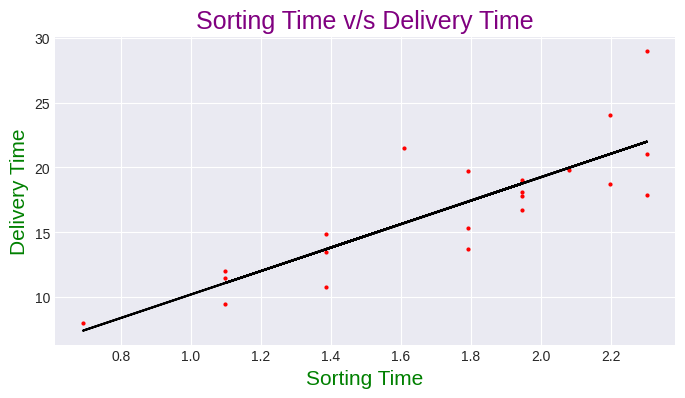

In [ ]:
#Plotting

plt.figure(figsize=(8,4))
plt.style.use("seaborn-darkgrid")

plt.scatter(np.log(data_df['sorting_time']),data_df['delivery_time'],color="red",s=4)
plt.plot(np.log(data_df['sorting_time']),model2.predict(),color="black")

plt.title("Sorting Time v/s Delivery Time",size=18,color="purple")
plt.xlabel('Sorting Time',size=15,color='green')
plt.ylabel('Delivery Time',size=15,color='green')
plt.show();

### Model-3 equation :- **`log(y_hat) = m*x + c`**

In [ ]:
model3=smf.ols('np.log(delivery_time)~sorting_time',data=data_df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Sun, 10 Sep 2023   Prob (F-statistic):           1.59e-06
Time:                           17:33:43   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
sorting_time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Predicted Equation of straight line for "model3" is: <br>
`y_hat = 	0.1056*x + 2.1214`

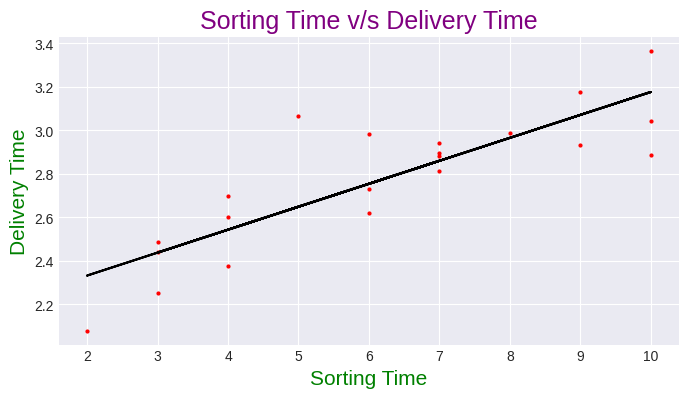

In [ ]:
#Plotting

plt.figure(figsize=(8,4))
plt.style.use("seaborn-darkgrid")

plt.scatter(data_df['sorting_time'],np.log(data_df['delivery_time']),color="red",s=4)
plt.plot(data_df['sorting_time'],model3.predict(),color="black")

plt.title("Sorting Time v/s Delivery Time",size=18,color="purple")
plt.xlabel('Sorting Time',size=15,color='green')
plt.ylabel('Delivery Time',size=15,color='green')
plt.show();

### Model-4 equation :- **`log(y_hat) = m1*x + m2*x^2 + c`**

In [ ]:
model4= smf.ols('np.log(delivery_time)~sorting_time+pow(sorting_time,2)',data=data_df).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.765
Model:                               OLS   Adj. R-squared:                  0.739
Method:                    Least Squares   F-statistic:                     29.28
Date:                   Sun, 10 Sep 2023   Prob (F-statistic):           2.20e-06
Time:                           17:38:34   Log-Likelihood:                 9.9597
No. Observations:                     21   AIC:                            -13.92
Df Residuals:                         18   BIC:                            -10.79
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.6997      0.228      7.441      0.000       1.220       2.180
sorting_time             0.2659      0.080      3.315      0.004       0.097       0.434
pow(sorting_time, 2)    -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Predicted Equation of straight line for "model4" is: <br>
`y_hat = 0.2659*x - 0.0128*x^2 + 1.6997`

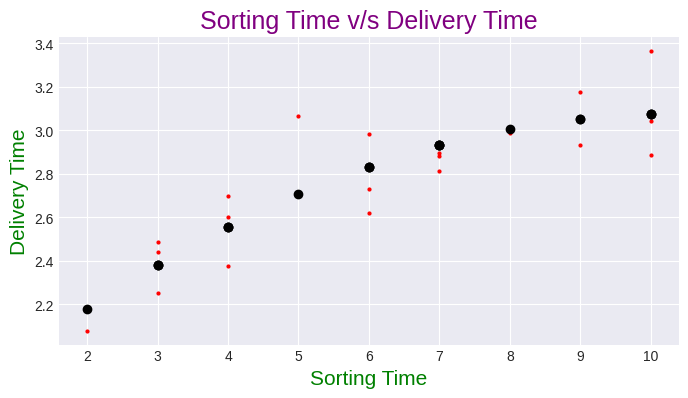

In [ ]:
plt.figure(figsize=(8,4))
plt.style.use('seaborn-darkgrid')

plt.scatter(data_df['sorting_time'],np.log(data_df['delivery_time']),s=4,color='red')
plt.scatter(data_df['sorting_time'],model4.fittedvalues,color='black')

plt.title("Sorting Time v/s Delivery Time",size=18,color="purple")
plt.xlabel('Sorting Time',size=15,color='green')
plt.ylabel('Delivery Time',size=15,color='green')
plt.show();

**R-squared** <br>
R2 is a statistical metric for how much of the variation in the dependent variable can be attributed to the model. <br> Value for R-squared lies between 0 and 1, with a greater value suggesting a more precise match between the model and the data i.e. the greater the value for R-squared the better the model is.
<br><br>
Now we compare our four models on the basis of R-squared of each model.

**R-squared**
> for model-1 is  0.682

> for model-2 is 	0.695

> for model-3 is  0.711

> for model-4 is 	0.765

This implies our **Model-4 is the best model** between these 4 models